# DATA ANALYTICS: MODULO 3. Ejercicio de evaluación final

In [167]:
#IMPORTAR LIBRERIAS

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer


# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

## EXTRACCIÓN DE DATOS

In [168]:
df_flight = pd.read_csv('./datasets/Customer Flight Activity.csv')
df_loyalty = pd.read_csv('./datasets/Customer Loyalty History.csv')

## FASE1: EXPLORACIÓN INICIAL Y LIMPIEZA DE DATOS

En primer lugar, se realiza una exploración inicial de los datos utilizando el método head() para observar las primeras filas del conjunto de datos y comprobar su estructura general. Asimismo, se emplea el método info() para analizar el tipo de dato de cada columna, identificar posibles valores nulos y verificar que los tipos de datos sean coherentes con la información que representan.

De manera adicional, se revisan los nombres de las columnas para detectar posibles inconsistencias o columnas que puedan no aportar información relevante al análisis.

In [169]:
df_flight.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [170]:
df_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [171]:
df_loyalty.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [172]:
df_loyalty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

Hallazgos iniciales

- Tipos de datos
Tras la revisión de las variables, se comprobó que los tipos de datos asignados a cada columna son coherentes con la naturaleza de la información que representan.

- Valores nulos

  - Los valores nulos en las variables Cancellation Year y Cancellation Month parecen coherentes, ya que probablemente corresponden a clientes que continúan activos en el programa de fidelización.

  - Los valores nulos en la variable Salary deberán ser analizados y gestionados en una fase posterior del proceso.

________________________________________________________________________________________
### Análisis de variables categóricas

A continuación, se analizan las variables de tipo categórico para identificar sus valores únicos y evaluar si aportan información relevante al análisis. Para ello, se utiliza el método describe(include='object'), que permite obtener una visión general de las variables categóricas presentes en el conjunto de datos.

In [173]:
df_loyalty.describe(include = 'object').T

,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


Posteriormente, se revisan de forma individual los valores únicos y la distribución de frecuencias de cada variable categórica, con el objetivo de detectar posibles inconsistencias o columnas con baja variabilidad.

In [174]:
print(f'Valores unicos de Province: {df_loyalty['Province'].unique()}')
print(f'Valores unicos de City: {df_loyalty['City'].unique()}')
print(f'Valores unicos de Education: {df_loyalty['Education'].unique()}')
print(f'Valores unicos de Gender: {df_loyalty['Gender'].unique()}')
print(f'Valores unicos de Loyalty Card: {df_loyalty['Loyalty Card'].unique()}')
print(f'Valores unicos de Enrollment Type: {df_loyalty['Enrollment Type'].unique()}')

Valores unicos de Province: ['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']
Valores unicos de City: ['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Whitehorse' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Fredericton' 'Ottawa' 'Tremblant' 'Calgary'
 'Thunder Bay' 'Whistler' 'Peace River' 'Winnipeg' 'Sudbury'
 'West Vancouver' 'Halifax' 'London' 'Regina' 'Kelowna' "St. John's"
 'Victoria' 'Kingston' 'Banff' 'Moncton' 'Charlottetown']
Valores unicos de Education: ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
Valores unicos de Gender: ['Female' 'Male']
Valores unicos de Loyalty Card: ['Star' 'Aurora' 'Nova']
Valores unicos de Enrollment Type: ['Standard' '2018 Promotion']


In [175]:
for col in df_loyalty.select_dtypes(include='object'):
    print('-----------------------------')
    print(df_loyalty[col].unique())
    print(df_loyalty[col].value_counts())

-----------------------------
['Canada']
Country
Canada    16737
Name: count, dtype: int64
-----------------------------
['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']
Province
Ontario                 5404
British Columbia        4409
Quebec                  3300
Alberta                  969
Manitoba                 658
New Brunswick            636
Nova Scotia              518
Saskatchewan             409
Newfoundland             258
Yukon                    110
Prince Edward Island      66
Name: count, dtype: int64
-----------------------------
['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Whitehorse' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Fredericton' 'Ottawa' 'Tremblant' 'Calgary'
 'Thunder Bay' 'Whistler' 'Peace River' 'Winnipeg' 'Sudbury'
 'West Vancouver' 'Halifax' 'London' 'Regina' 'Kelowna' "St. John's"
 'Victoria' 'Kingston' 'Banff' 'Moncton' 'Charlottetown']
Cit

### Hallazgos: 

- La variable Country no aporta información adicional al análisis, ya que todos los registros presentan el mismo valor (Canada).
- El resto de variables categóricas presentan variabilidad suficiente y resultan potencialmente relevantes para análisis posteriores.

### Eliminación de variables no informativas: 
Dado que la variable Country presenta un único valor (Canada) en todos los registros, se considera que no aporta información adicional al análisis. Por este motivo, se procede a eliminar dicha columna del conjunto de datos de clientes.

In [176]:
df_loyalty.drop(columns = ['Country'], inplace = True) 
df_loyalty.columns

Index(['Loyalty Number', 'Province', 'City', 'Postal Code', 'Gender',
       'Education', 'Salary', 'Marital Status', 'Loyalty Card', 'CLV',
       'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

### Detección de registros duplicados

A continuación, se revisa la posible existencia de registros duplicados en el conjunto de datos de actividad de vuelos. Para ello, se utiliza el método duplicated(), que permite identificar filas completamente idénticas en todas sus columnas.

In [177]:
df_flight.duplicated().sum()

1864

Dado que se detectan registros duplicados, se procede a visualizarlos para analizar si se trata de duplicados coherentes con la estructura del dataset o si deben ser eliminados. Para facilitar su revisión, los registros duplicados se ordenan por identificador de cliente y periodo temporal.

In [178]:
df_flight[df_flight.duplicated(keep=False)].sort_values(by=['Loyalty Number', 'Year', 'Month'])

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
41,101902,2017,1,0,0,0,0,0.0,0,0
42,101902,2017,1,0,0,0,0,0.0,0,0
16942,101902,2017,2,0,0,0,0,0.0,0,0
16943,101902,2017,2,0,0,0,0,0.0,0,0
33843,101902,2017,3,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
151972,992168,2017,9,0,0,0,0,0.0,0,0
304080,992168,2018,6,0,0,0,0,0.0,0,0
304081,992168,2018,6,0,0,0,0,0.0,0,0
354783,992168,2018,9,0,0,0,0,0.0,0,0


Eliminación de duplicados completos

Los registros duplicados detectados en el conjunto de datos Customer Flight Activity corresponden a filas completamente idénticas en todas sus columnas. Dado que no aportan información adicional, se procede a su eliminación sin que ello suponga pérdida de información relevante.

In [179]:
df_flight.drop_duplicates(inplace=True)

Revisión de posibles duplicados parciales

Una vez eliminados los duplicados completos, se analiza si existen registros duplicados a nivel de cliente y periodo temporal. En concreto, se comprueba si un mismo cliente presenta más de un registro para el mismo año y mes, lo cual podría indicar duplicados parciales o múltiples observaciones dentro del mismo periodo.

In [180]:
df_flight.duplicated(subset=['Loyalty Number', 'Year', 'Month']).sum()

2072

Para facilitar la revisión, se muestran los registros que cumplen esta condición:

In [181]:
df_flight[df_flight.duplicated(subset=['Loyalty Number', 'Year', 'Month'],keep=False)]

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
114,106001,2017,1,9,4,13,1365,136.0,0,0
115,106001,2017,1,5,0,5,910,91.0,0,0
275,114414,2017,1,8,4,12,3132,313.0,0,0
276,114414,2017,1,1,1,2,1094,109.0,0,0
488,126490,2017,1,6,0,6,1902,190.0,0,0
...,...,...,...,...,...,...,...,...,...,...
405299,981508,2018,12,5,5,10,4030,403.0,0,0
405451,990512,2018,12,15,5,20,2940,294.0,0,0
405452,990512,2018,12,5,2,7,3906,390.0,0,0
405486,992168,2018,12,15,0,15,3120,312.0,0,0


Aunque existen múltiples registros para un mismo cliente en un mismo mes, estos no corresponden a duplicados exactos, ya que presentan valores diferentes en variables clave como distancia, vuelos o puntos acumulados. Por tanto, estos registros se consideran observaciones válidas y no se eliminan.

Revisión de duplicados en el conjunto de datos de clientes.
A continuación, se analiza la posible existencia de registros duplicados en el conjunto de datos Customer Loyalty History.

In [182]:
df_loyalty.duplicated().sum()

0

El resultado obtenido indica que no existen filas completamente duplicadas.

Asimismo, se comprueba si existen duplicados a nivel de identificador de cliente:

In [183]:
df_loyalty.duplicated(subset=['Loyalty Number']).sum()

0

No se detectan valores duplicados en el conjunto de datos de historial de lealtad ni a nivel de filas completas ni a nivel del identificador único del cliente (Loyalty Number). Esto indica que cada cliente está representado una única vez, lo cual es coherente con la naturaleza del datase

### Análisis descriptivo de variables numéricas

A continuación, se realiza un análisis descriptivo de las variables numéricas de ambos conjuntos de datos con el objetivo de evaluar rangos, detectar posibles incoherencias y obtener una visión general de la distribución de los datos.

In [184]:
df_flight.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,403760.0,549875.383713,258961.514684,100018.0,326699.0,550598.0,772152.0,999986.0
Year,403760.0,2017.500352,0.500000,2017.0,2017.0,2018.0,2018.0,2018.0
Month,403760.0,6.501335,3.451982,1.0,4.0,7.0,10.0,12.0
Flights Booked,403760.0,4.134050,5.230064,0.0,0.0,1.0,8.0,21.0
Flights with Companions,403760.0,1.036569,2.080472,0.0,0.0,0.0,1.0,11.0
Total Flights,403760.0,5.170619,6.526858,0.0,0.0,1.0,10.0,32.0
Distance,403760.0,1214.460979,1434.098521,0.0,0.0,525.0,2342.0,6293.0
Points Accumulated,403760.0,124.263761,146.696179,0.0,0.0,53.0,240.0,676.5
Points Redeemed,403760.0,30.838587,125.758002,0.0,0.0,0.0,0.0,876.0
Dollar Cost Points Redeemed,403760.0,2.495973,10.172033,0.0,0.0,0.0,0.0,71.0


In [185]:
df_loyalty.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


#### Detección y tratamiento de salarios negativos
A partir del análisis descriptivo, se detectan valores negativos en la variable Salary, lo cual no es coherente con el contexto del análisis. Para identificar estos casos, se filtran los registros con salarios negativos:

In [186]:
df_loyalty[df_loyalty["Salary"]<0]


,Loyalty Number,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
1082,542976,Quebec,Montreal,H2Y 4R4,Male,High School or Below,-49830.0,Divorced,Star,24127.50,2018 Promotion,2018,3,NaN,NaN
1894,959977,British Columbia,Vancouver,V5R 1W3,Female,Bachelor,-12497.0,Married,Aurora,9453.00,2018 Promotion,2018,3,NaN,NaN
2471,232755,British Columbia,Vancouver,V1E 4R6,Female,Bachelor,-46683.0,Single,Nova,4787.81,2018 Promotion,2018,3,NaN,NaN
3575,525245,British Columbia,Victoria,V10 6T5,Male,Bachelor,-45962.0,Married,Star,2402.33,2018 Promotion,2018,3,NaN,NaN
3932,603070,British Columbia,West Vancouver,V6V 8Z3,Female,Bachelor,-19325.0,Single,Star,2893.74,2018 Promotion,2018,3,NaN,NaN
4712,491242,British Columbia,Dawson Creek,U5I 4F1,Male,Bachelor,-43234.0,Married,Star,7597.91,2018 Promotion,2018,3,NaN,NaN
6560,115505,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-10605.0,Married,Nova,5860.17,2018 Promotion,2018,4,NaN,NaN
6570,430398,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-17534.0,Married,Nova,49423.80,2018 Promotion,2018,3,NaN,NaN
7373,152016,Ontario,Toronto,P1J 8T7,Female,Bachelor,-58486.0,Married,Aurora,5067.21,2018 Promotion,2018,2,NaN,NaN
8576,194065,Ontario,Sudbury,M5V 1G5,Female,Bachelor,-31911.0,Married,Nova,2888.85,2018 Promotion,2018,2,NaN,NaN


Ante esta situación, existen distintas alternativas metodológicas, como:

- tratar dichos valores como datos nulos, o

- considerar su valor absoluto.

Dado que no es posible conocer con certeza el origen del error y siguiendo el criterio indicado en clase, en este ejercicio se opta por utilizar el valor absoluto de los salarios para poder continuar con el análisis.

In [187]:
df_loyalty["Salary"] = df_loyalty["Salary"].abs()

Finalmente, se verifica que no existen valores negativos en la variable Salary tras la corrección aplicada:

In [188]:
df_loyalty[df_loyalty["Salary"]<0]

,Loyalty Number,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month


### Análisis de valores nulos

A continuación, se analiza la presencia de valores nulos en ambos conjuntos de datos con el objetivo de identificar posibles problemas de calidad de datos y determinar si es necesario aplicar algún tratamiento previo al análisis.

In [189]:
nulos = df_flight.isnull().sum()
nulos

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [190]:
nulos = df_loyalty.isnull().sum()
nulos

Loyalty Number            0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

Para evaluar la magnitud de los valores nulos, se calcula también el porcentaje de valores faltantes respecto al total de registros:

In [191]:
nulos = df_loyalty.isnull().sum()/df_loyalty.shape[0]*100
nulos

Loyalty Number         0.000000
Province               0.000000
City                   0.000000
Postal Code            0.000000
Gender                 0.000000
Education              0.000000
Salary                25.321145
Marital Status         0.000000
Loyalty Card           0.000000
CLV                    0.000000
Enrollment Type        0.000000
Enrollment Year        0.000000
Enrollment Month       0.000000
Cancellation Year     87.650117
Cancellation Month    87.650117
dtype: float64

### Hallazgos

Tal como se había anticipado en fases anteriores del análisis:

- Las variables Cancellation Year y Cancellation Month presentan valores nulos que se consideran lógicos, ya que corresponden a clientes que continúan activos en el programa de fidelización.

- La variable Salary presenta un porcentaje elevado de valores nulos, lo cual resulta relevante dado que será utilizada en análisis posteriores.

Dado que Salary es una variable numérica y presenta un porcentaje alto de valores faltantes, se opta por aplicar una técnica de imputación más avanzada. En caso de que el porcentaje de nulos hubiera sido reducido, se podría haber considerado la imputación mediante la media o la mediana.

### Gestión de valores nulos en la variable Salary

Dado que la variable Salary presenta un porcentaje elevado de valores nulos y se trata de una variable numérica relevante para análisis posteriores, se opta por aplicar una técnica de imputación avanzada. En este caso, se utiliza el método KNN Imputer, que estima los valores faltantes a partir de los valores más cercanos en el conjunto de datos.

Este método resulta adecuado en este contexto, ya que el tamaño del dataset es manejable y permite preservar mejor la estructura de los datos en comparación con imputaciones más simples como la media o la mediana.

In [192]:
imputer_knn = KNNImputer(n_neighbors=5)
df_loyalty['Salary'] = imputer_knn.fit_transform(df_loyalty[['Salary']])

Una vez aplicada la imputación, se verifica que no existen valores nulos restantes en el conjunto de datos:

In [193]:
nulos = df_loyalty.isnull().sum()/df_loyalty.shape[0]*100
nulos

Loyalty Number         0.000000
Province               0.000000
City                   0.000000
Postal Code            0.000000
Gender                 0.000000
Education              0.000000
Salary                 0.000000
Marital Status         0.000000
Loyalty Card           0.000000
CLV                    0.000000
Enrollment Type        0.000000
Enrollment Year        0.000000
Enrollment Month       0.000000
Cancellation Year     87.650117
Cancellation Month    87.650117
dtype: float64

### Identificación de valores atípicos en variables numéricas

A continuación, se procede a la identificación de valores atípicos en las variables numéricas relevantes del conjunto de datos.

In [194]:
variables_numericas = [
    'Flights Booked',
    'Flights with Companions',
    'Total Flights',
    'Distance',
    'Points Accumulated',
    'Points Redeemed',
    'Dollar Cost Points Redeemed',
    'Salary',
    'CLV'
]

for col in variables_numericas:
    Q1 = df_merge[col].quantile(0.25)
    Q3 = df_merge[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df_merge[
        (df_merge[col] < lower_bound) |
        (df_merge[col] > upper_bound)
    ]
    
    print(f'Variable: {col}')
    print(f'  Número de outliers detectados: {outliers.shape[0]}')
    print()

Variable: Flights Booked
  Número de outliers detectados: 528

Variable: Flights with Companions
  Número de outliers detectados: 71560

Variable: Total Flights
  Número de outliers detectados: 1984

Variable: Distance
  Número de outliers detectados: 125

Variable: Points Accumulated
  Número de outliers detectados: 112

Variable: Points Redeemed
  Número de outliers detectados: 24181

Variable: Dollar Cost Points Redeemed
  Número de outliers detectados: 24181

Variable: Salary
  Número de outliers detectados: 20876

Variable: CLV
  Número de outliers detectados: 35941



Los valores identificados como atípicos no se consideran necesariamente errores en los datos, sino comportamientos extremos pero plausibles de determinados clientes, especialmente en variables relacionadas con la actividad de vuelo y el uso de puntos. Por este motivo, los outliers se mantienen para el análisis posterior.

### Análisis gráfico de variables numéricas

Con el objetivo de analizar la distribución de las principales variables numéricas y detectar la presencia de posibles valores atípicos, se generan gráficos exploratorios mediante boxplots e histogramas. Los boxplots permiten identificar la dispersión y los valores extremos, mientras que los histogramas facilitan el análisis de la forma de las distribuciones y la concentración de los datos.

A continuación, se presentan estos gráficos para las variables más relevantes del conjunto de datos.

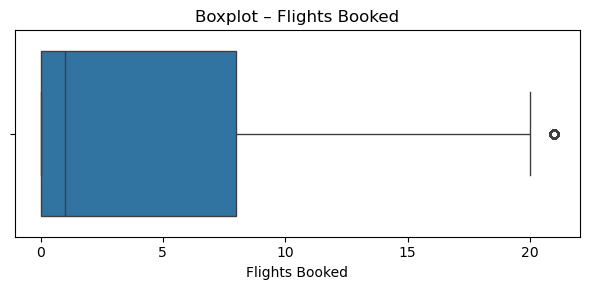

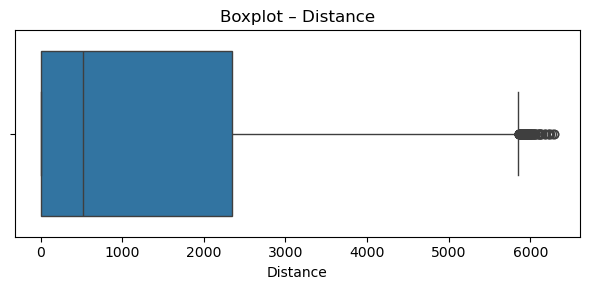

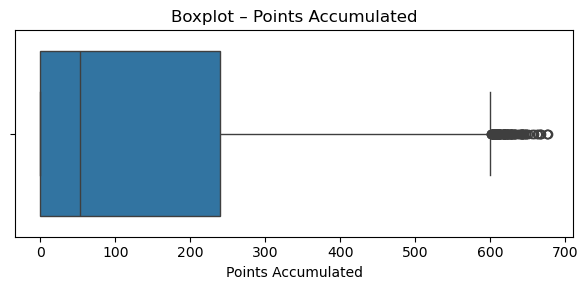

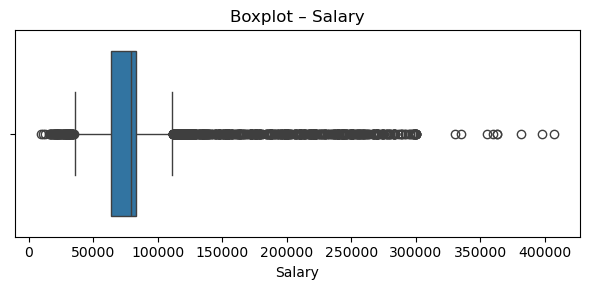

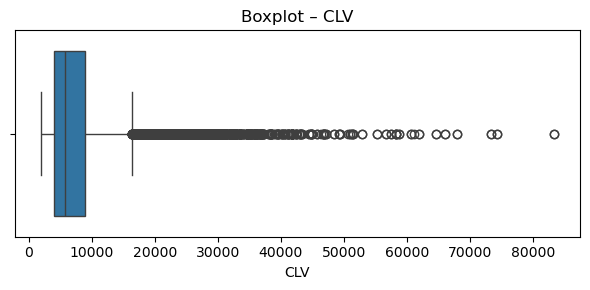

In [195]:
variables_boxplot = {
    'Flights Booked': df_flight['Flights Booked'],
    'Distance': df_flight['Distance'],
    'Points Accumulated': df_flight['Points Accumulated'],
    'Salary': df_loyalty['Salary'],
    'CLV': df_loyalty['CLV']
}

for name, series in variables_boxplot.items():
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=series)
    plt.title(f'Boxplot – {name}')
    plt.tight_layout()
    plt.show()

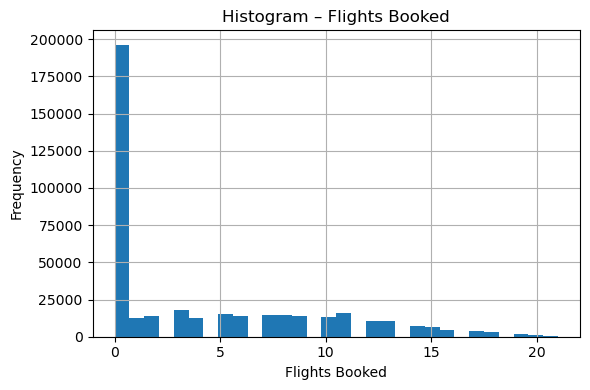

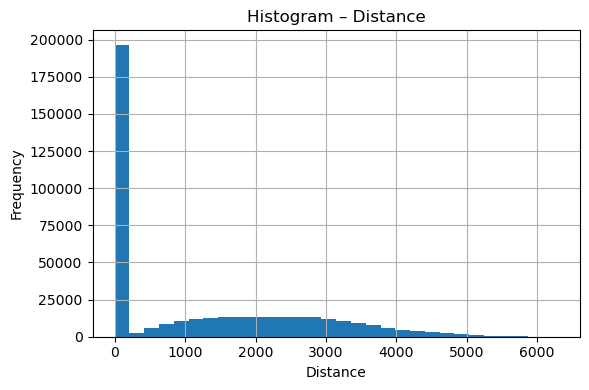

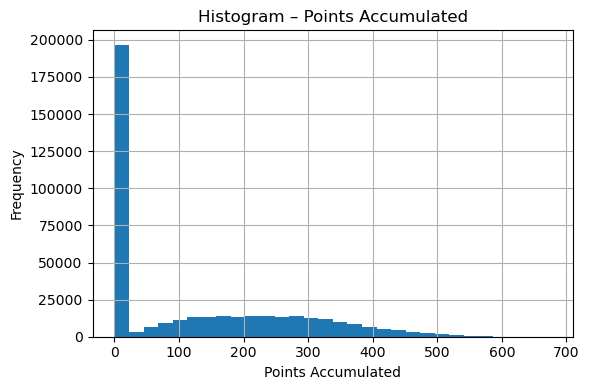

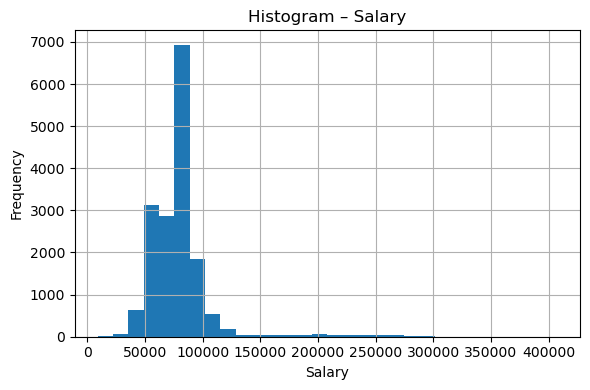

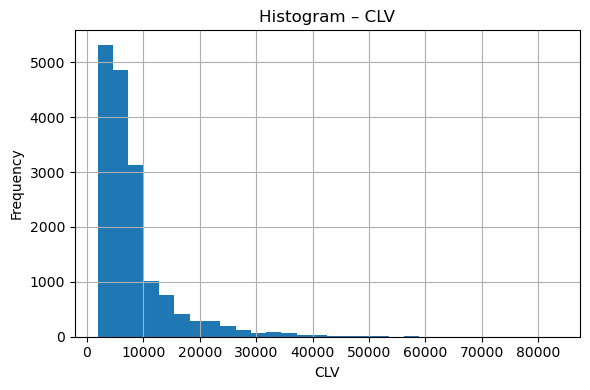

In [196]:
variables_hist = {
    'Flights Booked': df_flight['Flights Booked'],
    'Distance': df_flight['Distance'],
    'Points Accumulated': df_flight['Points Accumulated'],
    'Salary': df_loyalty['Salary'],
    'CLV': df_loyalty['CLV']
}

for name, series in variables_hist.items():
    plt.figure(figsize=(6, 4))
    series.hist(bins=30)
    plt.title(f'Histogram – {name}')
    plt.xlabel(name)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

### Unión de los conjuntos de datos

Una vez realizada la limpieza y preparación de ambos conjuntos de datos, se procede a su integración con el objetivo de combinar la información demográfica y de fidelización de los clientes con su actividad de vuelos. Para ello, se realiza una unión utilizando como clave común el identificador único del cliente (Loyalty Number).

In [197]:
df_merge = df_loyalty.merge(df_flight, left_on = 'Loyalty Number', right_on = 'Loyalty Number')
df_merge.head(5)

,Loyalty Number,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,1,0,0,0,0,0.0,0,0
1,480934,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,2,3,0,3,2823,282.0,0,0
2,480934,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,3,0,0,0,0,0.0,0,0
3,480934,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,4,0,0,0,0,0.0,0,0
4,480934,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2018,10,6,2,8,3352,335.0,465,38


#### Validación del resultado del merge

Para comprobar que la unión se ha realizado correctamente, se comparan las dimensiones de los conjuntos de datos antes y después del merge:

In [198]:
df_loyalty.shape

(16737, 15)

In [199]:
df_flight.shape

(403760, 10)

In [200]:
df_merge.shape

(403760, 24)

Asimismo, se revisan las columnas del nuevo conjunto de datos para detectar posibles duplicidades o inconsistencias:

In [201]:
df_merge.columns

Index(['Loyalty Number', 'Province', 'City', 'Postal Code', 'Gender',
       'Education', 'Salary', 'Marital Status', 'Loyalty Card', 'CLV',
       'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month', 'Year', 'Month',
       'Flights Booked', 'Flights with Companions', 'Total Flights',
       'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed'],
      dtype='object')

Tras esta revisión, no se identifican columnas duplicadas ni conflictos derivados de la unión, por lo que se mantiene la estructura resultante del conjunto de datos.

### Revisión de valores nulos tras la unión de los datasets

Una vez integrados ambos conjuntos de datos, se realiza una nueva revisión de la presencia de valores nulos para asegurar la coherencia del dataset final.

In [202]:
nulos = df_merge.isnull().sum()/df_merge.shape[0]*100
nulos

Loyalty Number                  0.000000
Province                        0.000000
City                            0.000000
Postal Code                     0.000000
Gender                          0.000000
Education                       0.000000
Salary                          0.000000
Marital Status                  0.000000
Loyalty Card                    0.000000
CLV                             0.000000
Enrollment Type                 0.000000
Enrollment Year                 0.000000
Enrollment Month                0.000000
Cancellation Year              87.703091
Cancellation Month             87.703091
Year                            0.000000
Month                           0.000000
Flights Booked                  0.000000
Flights with Companions         0.000000
Total Flights                   0.000000
Distance                        0.000000
Points Accumulated              0.000000
Points Redeemed                 0.000000
Dollar Cost Points Redeemed     0.000000
dtype: float64

Tras la unión de los datasets, se revisó la presencia de valores nulos. Únicamente se detectan valores faltantes en las variables de cancelación, lo cual es coherente con clientes que continúan activos en el programa de fidelización.

## FASE 2: ANÁLISIS ESTADISTICO

In [203]:
datos = [
    'Flights Booked',
    'Flights with Companions',
    'Total Flights',
    'Distance',
    'Points Accumulated',
    'Points Redeemed',
    'Dollar Cost Points Redeemed',
    'Salary',
    'CLV'
]

# Calcular y mostrar estadísticas para cada columna
for col in datos:
    print(f"Estadísticas de {col}:")
    print(f"  Media: {df_merge[col].mean():.2f}")
    print(f"  Mediana: {df_merge[col].median():.2f}")
    print(f"  Moda: {df_merge[col].mode().iloc[0]}")
    print(f"  Desviación estándar: {df_merge[col].std():.2f}")
    print(f"  Coeficiente de variación: {(df_merge[col].std() / df_merge[col].mean())*100:.2f}%")
    print(f"  Mínimo: {df_merge[col].min()}")
    print(f"  Máximo: {df_merge[col].max()}")
    print(f"  IQR: {df_merge[col].quantile(0.75) - df_merge[col].quantile(0.25)}")
    print()

Estadísticas de Flights Booked:
  Media: 4.13
  Mediana: 1.00
  Moda: 0
  Desviación estándar: 5.23
  Coeficiente de variación: 126.51%
  Mínimo: 0
  Máximo: 21
  IQR: 8.0

Estadísticas de Flights with Companions:
  Media: 1.04
  Mediana: 0.00
  Moda: 0
  Desviación estándar: 2.08
  Coeficiente de variación: 200.71%
  Mínimo: 0
  Máximo: 11
  IQR: 1.0

Estadísticas de Total Flights:
  Media: 5.17
  Mediana: 1.00
  Moda: 0
  Desviación estándar: 6.53
  Coeficiente de variación: 126.23%
  Mínimo: 0
  Máximo: 32
  IQR: 10.0

Estadísticas de Distance:
  Media: 1214.46
  Mediana: 525.00
  Moda: 0
  Desviación estándar: 1434.10
  Coeficiente de variación: 118.09%
  Mínimo: 0
  Máximo: 6293
  IQR: 2342.0

Estadísticas de Points Accumulated:
  Media: 124.26
  Mediana: 53.00
  Moda: 0.0
  Desviación estándar: 146.70
  Coeficiente de variación: 118.05%
  Mínimo: 0.0
  Máximo: 676.5
  IQR: 240.0

Estadísticas de Points Redeemed:
  Media: 30.84
  Mediana: 0.00
  Moda: 0
  Desviación estándar: 125.

### Flights booked: 
La variable Flights Booked presenta una media de 4.13 frente a una mediana de 1, lo que indica que la mayoría de los clientes realiza pocos vuelos, mientras que un grupo reducido concentra una mayor actividad. El coeficiente de variación del 126.5% confirma una elevada dispersión relativa, coherente con la presencia de valores extremos detectados previamente.

### Flights with Companions

En Flights with Companions, la mediana es 0, lo que indica que al menos la mitad de los clientes no viaja con acompañantes. El coeficiente de variación del 200.7% refleja una gran heterogeneidad, con un número reducido de clientes que concentra la mayoría de los vuelos con acompañantes, lo que explica la elevada cantidad de valores atípicos observados.

### Total Flights

Total Flights muestra un patrón similar a Flights Booked, con una mediana baja frente a una media elevada y un coeficiente de variación del 126.2%. Esto evidencia una distribución asimétrica positiva y una elevada dispersión, consistente con la existencia de clientes con una actividad de vuelo muy superior a la media.

### Distance

La distancia recorrida presenta una diferencia notable entre media y mediana, junto con un coeficiente de variación del 118.1%, lo que indica una distribución muy dispersa. Este comportamiento es coherente con la presencia de trayectos excepcionalmente largos realizados por un número reducido de clientes.

### Points Accumulated

Points Accumulated presenta una elevada variabilidad relativa (CV ≈ 118%), lo que sugiere que la acumulación de puntos depende en gran medida del comportamiento de vuelo individual. Los valores atípicos detectados refuerzan la idea de que existen perfiles de clientes con una actividad significativamente más intensa.

### Points Redeemed

La mayoría de los clientes no canjea puntos, como reflejan una mediana e IQR iguales a 0. No obstante, el coeficiente de variación del 407.8% pone de manifiesto que un grupo muy reducido realiza canjes elevados, generando una distribución extremadamente dispersa y con numerosos valores atípicos.

### Dollar Cost Points Redeemed

Esta variable presenta un comportamiento análogo a Points Redeemed, con una fuerte concentración de valores en cero y algunos valores extremos puntuales. El coeficiente de variación superior al 400% confirma la elevada dispersión observada.

### Salary

El salario presenta una distribución relativamente estable, con media y mediana prácticamente iguales y un coeficiente de variación del 37.8%, lo que indica una variabilidad moderada en relación con la media. No obstante, la existencia de valores atípicos sugiere la presencia de salarios significativamente más elevados en determinados perfiles de clientes.

### CLV 
El Customer Lifetime Value muestra una elevada dispersión relativa (CV ≈ 85.9%), lo que indica que el valor aportado por los clientes a la empresa es muy desigual. La detección de un número elevado de valores atípicos refuerza la idea de que una minoría de clientes concentra una parte sustancial del valor total.

## Análisis de correlación entre variables numéricas.

Para analizar la relación entre las variables numéricas del conjunto de datos, se calcula la matriz de correlación utilizando el coeficiente de Spearman, adecuado en este contexto debido a la presencia de distribuciones asimétricas y valores extremos.

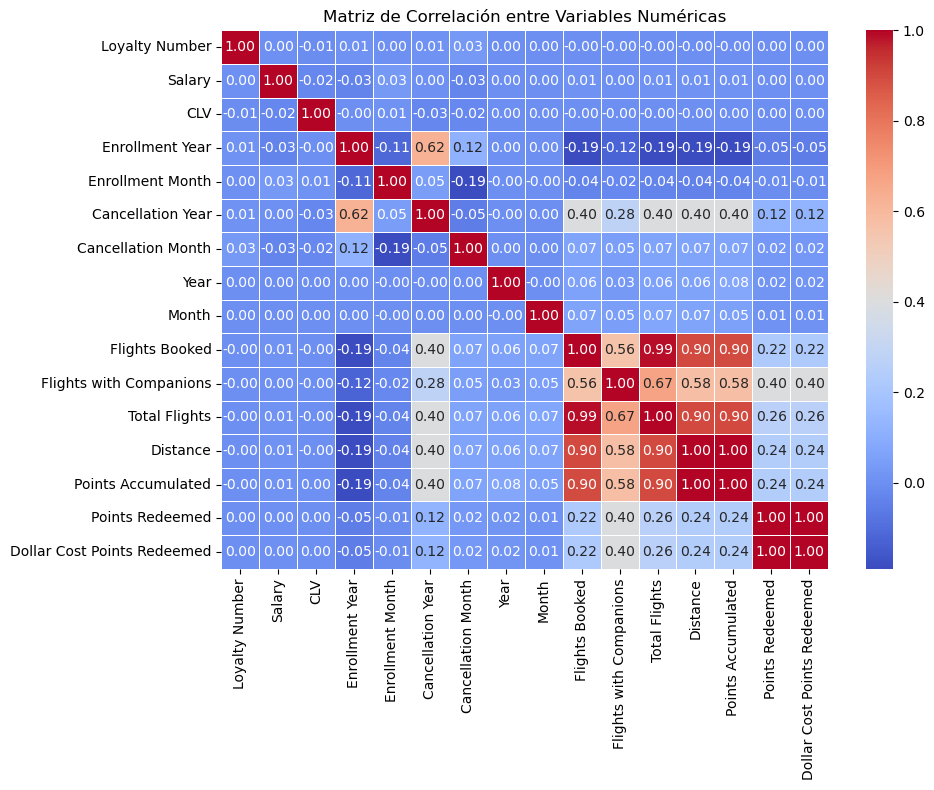

In [204]:
correlation_matrix = df_merge.select_dtypes(include="number").corr(method="spearman")

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=.5
)

plt.title('Matriz de Correlación entre Variables Numéricas')
plt.tight_layout()
plt.show()

### Interpretación del análisis de correlación

### Relación entre vuelos (Flights Booked y Total Flights)
Existe una correlación muy elevada entre Flights Booked y Total Flights, lo cual es coherente ya que los vuelos reservados en un período contribuyen al total acumulado de vuelos del cliente. No se trata de variables redundantes, sino de medidas a distinto nivel temporal.

### Actividad de vuelo, distancia y puntos
Se observa una fuerte relación positiva entre Flights Booked, Distance y Points Accumulated. Esto indica que los clientes que realizan más vuelos recorren mayores distancias y acumulan más puntos, lo que sugiere que el sistema de puntos está basado en la distancia recorrida.

### Puntos redimidos y coste en dólares
La correlación prácticamente perfecta entre Points Redeemed y Dollar Cost Points Redeemed confirma que ambas variables representan la misma información expresada en diferentes unidades.

### Vuelos con acompañantes
Flights with Companions presenta una correlación moderada con el número total de vuelos y la distancia, lo que sugiere que los clientes más activos tienden a viajar con acompañantes con mayor frecuencia.

### Valor del cliente (CLV)
El CLV presenta una correlación baja con las variables relacionadas con la actividad de vuelo. Esto indica que el valor de vida del cliente no depende únicamente del número de vuelos realizados o de la distancia recorrida, sino que está influido por otros factores adicionales.

### Salario
El salario presenta una correlación muy baja con la actividad de vuelo y la acumulación de puntos, lo que sugiere que el comportamiento de los clientes no está directamente condicionado por su nivel de ingresos.

### Variables temporales
Las variables temporales relacionadas con el año y mes de inscripción presentan correlaciones débiles con la actividad de vuelo, lo que indica que el comportamiento de los clientes no varía de forma significativa en función del momento de inscripción.
Por otro lado, la fecha de cancelación muestra una correlación moderada con algunas variables de actividad, lo que puede estar relacionado con el hecho de que los clientes que cancelan su membresía han acumulado previamente un cierto nivel de actividad en el programa.

## Análisis de variables categóricas:
Distribución de frecuencias de las variables categóricas relevantes.
Para analizar la composición del conjunto de datos en términos de variables categóricas, se calcula la distribución de frecuencias absoluta y relativa de las principales variables cualitativas.

In [205]:
variables_categoricas = [
    'Gender',
    'Education',
    'Marital Status',
    'Loyalty Card',
    'Enrollment Type',
    'Province'
]

for col in variables_categoricas:
    print(f'\nDistribución de frecuencias para {col}')
    
    frecuencia_abs = df_merge[col].value_counts()
    frecuencia_rel = df_merge[col].value_counts(normalize=True) * 100
    
    tabla = pd.DataFrame({
        'Frecuencia Absoluta': frecuencia_abs,
        'Frecuencia Relativa (%)': frecuencia_rel
    })
    
    display(tabla)


Distribución de frecuencias para Gender


,Frecuencia Absoluta,Frecuencia Relativa (%)
Gender,,
Female,202757,50.217208
Male,201003,49.782792



Distribución de frecuencias para Education


,Frecuencia Absoluta,Frecuencia Relativa (%)
Education,,
Bachelor,252567,62.553745
College,102260,25.326927
High School or Below,18915,4.684714
Doctor,17731,4.391470
Master,12287,3.043144



Distribución de frecuencias para Marital Status


,Frecuencia Absoluta,Frecuencia Relativa (%)
Marital Status,,
Married,234845,58.164504
Single,108153,26.786457
Divorced,60762,15.049039



Distribución de frecuencias para Loyalty Card


,Frecuencia Absoluta,Frecuencia Relativa (%)
Loyalty Card,,
Star,183745,45.508470
Nova,136883,33.902071
Aurora,83132,20.589459



Distribución de frecuencias para Enrollment Type


,Frecuencia Absoluta,Frecuencia Relativa (%)
Enrollment Type,,
Standard,380419,94.219091
2018 Promotion,23341,5.780909



Distribución de frecuencias para Province


,Frecuencia Absoluta,Frecuencia Relativa (%)
Province,,
Ontario,130258,32.261244
British Columbia,106442,26.362691
Quebec,79573,19.707995
Alberta,23360,5.785615
Manitoba,15900,3.937983
New Brunswick,15352,3.802259
Nova Scotia,12507,3.097632
Saskatchewan,9861,2.442292
Newfoundland,6244,1.546463


### INTERPRETACIÓN: 
Género
La distribución por género es prácticamente equilibrada, con una proporción muy similar de clientes femeninos y masculinos, lo que indica ausencia de sesgos relevantes en la composición de la muestra.

Nivel educativo
Predomina claramente el nivel Bachelor, seguido de College. Los niveles de Doctor y Master representan una proporción minoritaria, lo que sugiere que la mayoría de los clientes posee estudios universitarios de grado o formación equivalente.

Estado civil
La mayoría de los clientes están casados, seguidos por solteros y, en menor medida, divorciados. Esto indica una mayor representación de clientes con estructuras familiares estables dentro del programa de fidelización.

Tipo de tarjeta de fidelización
La tarjeta Star es la más frecuente, seguida de Nova y Aurora. Esto sugiere que la mayor parte de los clientes se concentra en los niveles intermedios del programa de fidelización.

Tipo de inscripción
La gran mayoría de los clientes se inscribieron mediante el tipo Standard, mientras que la promoción de 2018 representa un porcentaje reducido, lo que indica un impacto limitado de dicha campaña en el total de la base de clientes.

Provincia
La mayor concentración de clientes se encuentra en Ontario, British Columbia y Quebec, lo cual es coherente con la mayor densidad poblacional de estas provincias. El resto de provincias presenta una representación menor.

### Distribución de la cantidad de vuelos reservados por mes

Para analizar cómo se distribuye la actividad de vuelo a lo largo del año, se agrupan los vuelos reservados por mes y se representa su evolución mediante un gráfico de barras.

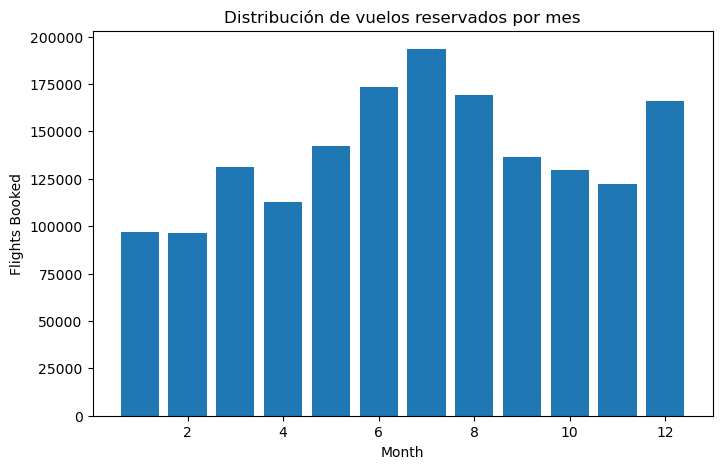

In [206]:
vuelos_por_mes = df_merge.groupby('Month')['Flights Booked'].sum()

plt.figure(figsize=(8, 5))
plt.bar(vuelos_por_mes.index, vuelos_por_mes.values)
plt.xlabel('Month')
plt.ylabel('Flights Booked')
plt.title('Distribución de vuelos reservados por mes')
plt.show()

#### Interpretación

La distribución de vuelos por mes muestra un patrón estacional, con un incremento de la actividad durante los meses de verano y un repunte en el mes de diciembre. Este comportamiento es coherente con los periodos vacacionales y refuerza los patrones observados previamente en el análisis de actividad de vuelo.

### Relación entre la distancia de los vuelos y los puntos acumulados

Para analizar la relación entre la distancia recorrida y los puntos acumulados por los clientes, se utiliza un diagrama de dispersión.

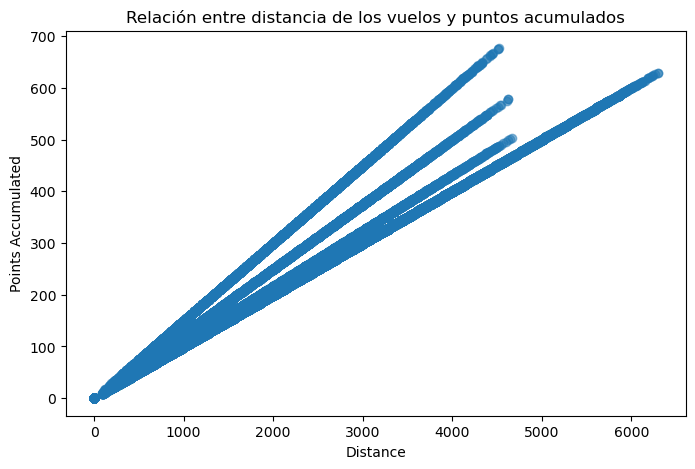

In [207]:
plt.figure(figsize=(8, 5))
plt.scatter(
    df_merge['Distance'],
    df_merge['Points Accumulated'],
    alpha=0.5
)

plt.xlabel('Distance')
plt.ylabel('Points Accumulated')
plt.title('Relación entre distancia de los vuelos y puntos acumulados')
plt.show()

El diagrama de dispersión muestra una relación positiva muy fuerte y prácticamente lineal entre la distancia recorrida y los puntos acumulados. La presencia de varias líneas paralelas sugiere que los puntos se asignan en función de la distancia, posiblemente aplicando distintos factores o reglas según el tipo de vuelo o el perfil del cliente.

### Distribución de clientes por provincia

Para analizar la distribución geográfica de los clientes, se representa el número de clientes por provincia mediante un gráfico de barras horizontales, lo que facilita la comparación entre categorías.

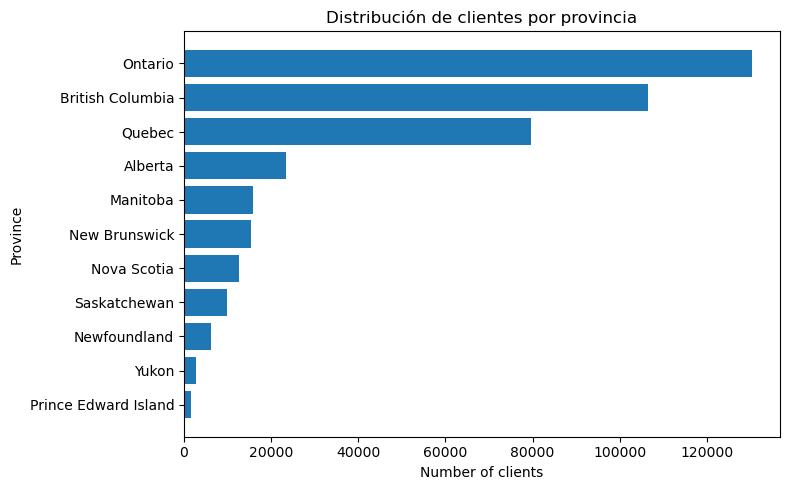

In [208]:
clientes_por_provincia = df_merge['Province'].value_counts()

plt.figure(figsize=(8, 5))
plt.barh(
    clientes_por_provincia.index,
    clientes_por_provincia.values
)

plt.xlabel('Number of clients')
plt.ylabel('Province')
plt.title('Distribución de clientes por provincia')
plt.gca().invert_yaxis()  # la más grande arriba
plt.tight_layout()
plt.show()

### Distribución de clientes por provincia (gráfico de sectores)

Como complemento al gráfico de barras, se representa la distribución relativa de clientes por provincia mediante un gráfico de sectores, con el objetivo de visualizar el peso porcentual de cada región dentro del total de la base de clientes.

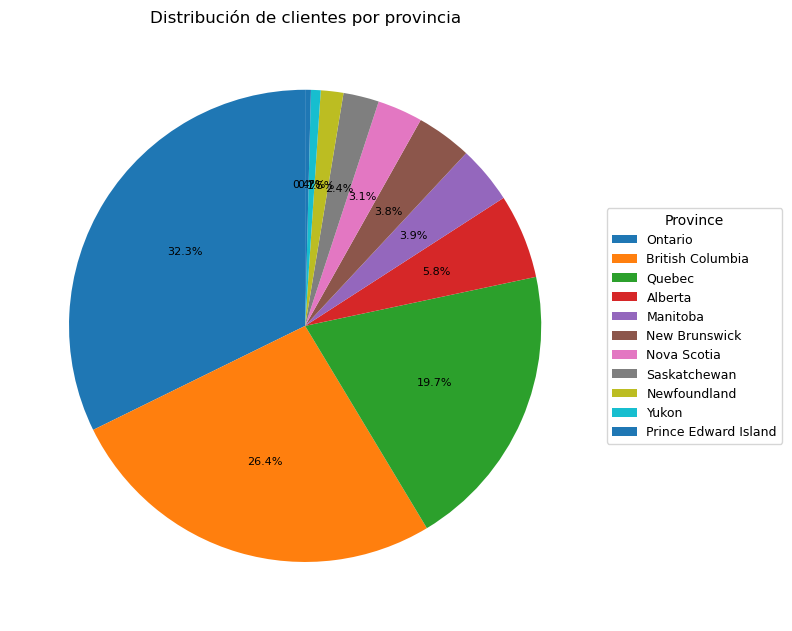

In [209]:
plt.figure(figsize=(8, 8))
plt.pie(
    clientes_por_provincia.values,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 8}
)

plt.legend(
    clientes_por_provincia.index,
    title='Province',
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    fontsize=9
)

plt.title('Distribución de clientes por provincia')
plt.tight_layout()
plt.show()

La distribución de clientes por provincia muestra una clara concentración en Ontario, British Columbia y Quebec, que agrupan la mayor parte de la base de clientes. El resto de provincias presenta una representación significativamente menor. El gráfico de barras permite comparar con mayor claridad el número de clientes entre provincias, mientras que el gráfico de sectores facilita la visualización de su peso relativo dentro del total.

### Comparación del salario promedio por nivel educativo

Para analizar cómo varía el salario promedio en función del nivel educativo de los clientes, se calcula el salario medio para cada categoría de educación y se representa mediante un gráfico de barras.

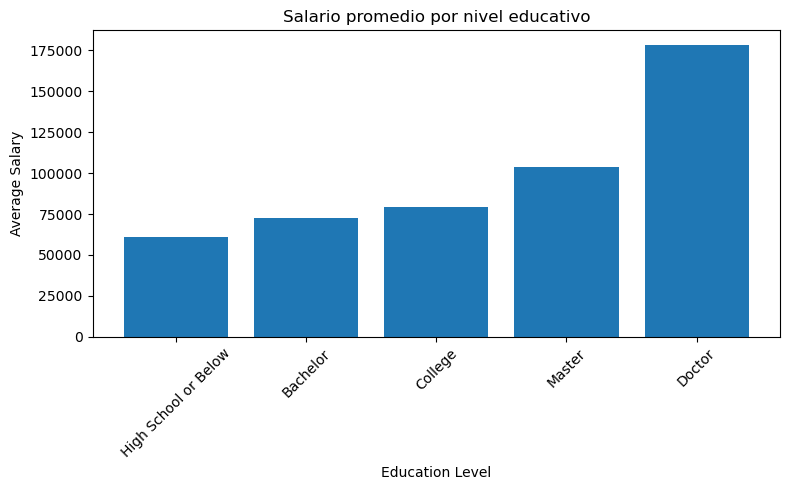

In [210]:
salario_por_educacion = df_merge.groupby('Education')['Salary'].mean().sort_values()

plt.figure(figsize=(8, 5))
plt.bar(
    salario_por_educacion.index,
    salario_por_educacion.values
)

plt.xlabel('Education Level')
plt.ylabel('Average Salary')
plt.title('Salario promedio por nivel educativo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Interpretación

El gráfico muestra una relación positiva entre el nivel educativo y el salario promedio. A medida que aumenta el nivel de estudios, el salario medio tiende a incrementarse, siendo los clientes con estudios de Doctor los que presentan los salarios más elevados, mientras que los niveles educativos más bajos muestran salarios promedio inferiores. Este patrón es coherente con lo esperado y refleja una tendencia general, aunque dentro de cada nivel educativo puede existir una variabilidad considerable.

### Proporción de clientes por tipo de tarjeta de fidelidad

Para analizar la distribución de los clientes según el tipo de tarjeta de fidelidad, se representa la proporción de cada categoría mediante un gráfico de sectores.

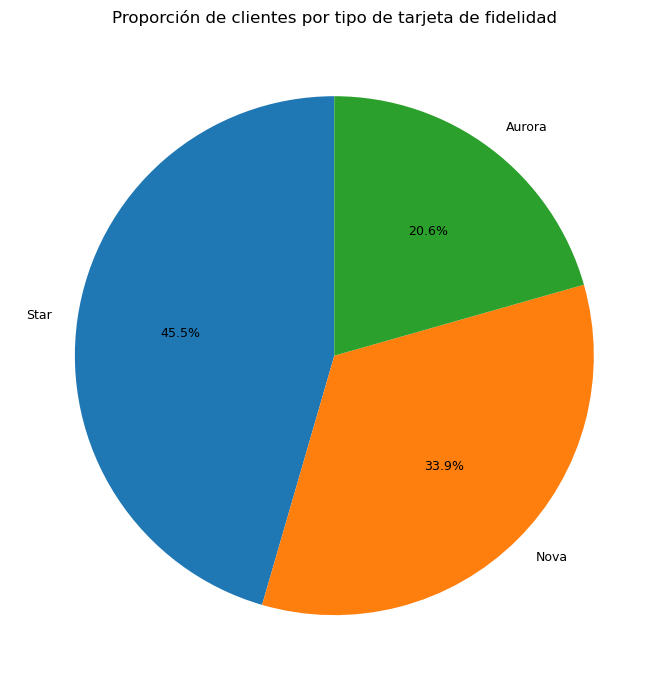

In [211]:
clientes_por_tarjeta = df_merge['Loyalty Card'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(
    clientes_por_tarjeta.values,
    labels=clientes_por_tarjeta.index,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 9}
)

plt.title('Proporción de clientes por tipo de tarjeta de fidelidad')
plt.tight_layout()
plt.show()

#### Interpretación

La mayor parte de los clientes dispone de la tarjeta Star, seguida por Nova y Aurora. 

### Distribución de clientes por estado civil y género

Para analizar cómo se distribuyen los clientes según su estado civil y género, se utiliza un gráfico de barras agrupadas que permite comparar el número de clientes de cada género dentro de cada categoría de estado civil.

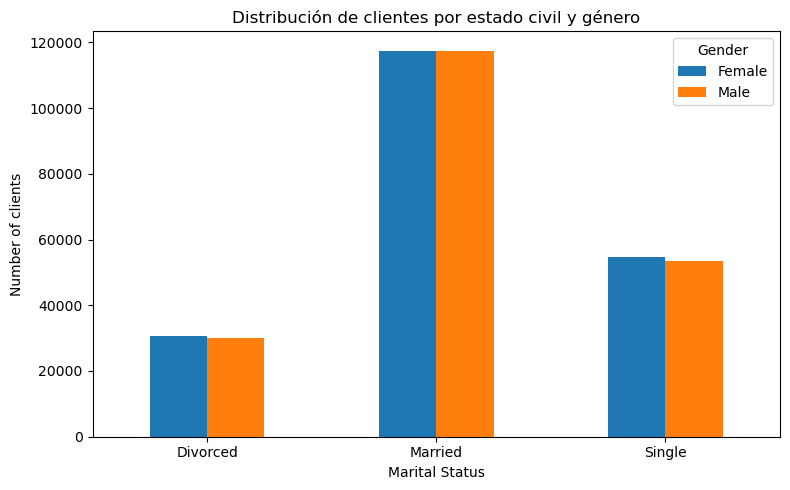

In [212]:
distribucion = (
    df_merge
    .groupby(['Marital Status', 'Gender'])
    .size()
    .unstack()
)

distribucion.plot(
    kind='bar',
    figsize=(8, 5)
)

plt.xlabel('Marital Status')
plt.ylabel('Number of clients')
plt.title('Distribución de clientes por estado civil y género')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Interpretación

La distribución muestra que, dentro de cada estado civil, la proporción de hombres y mujeres es similar, sin que se aprecien diferencias relevantes entre géneros. Este patrón sugiere una composición equilibrada de la base de clientes en términos de género para las distintas categorías de estado civil.

## FASE 4: Evaluación de Diferencias en reservas de Vuelos por Nivel Educativo

In [213]:
df_fase4 = df_merge[['Flights Booked', 'Education']]

estadisticas_por_educacion = (df_fase4.groupby('Education')['Flights Booked'].agg(['count', 'mean', 'std']))

estadisticas_por_educacion.round(2)

,count,mean,std
Education,,,
Bachelor,252567,4.11,5.22
College,102260,4.17,5.25
Doctor,17731,4.18,5.26
High School or Below,18915,4.18,5.24
Master,12287,4.20,5.21


El promedio de vuelos reservados es muy similar entre todos los niveles educativos, situándose en torno a 4.1–4.2 vuelos.

Las desviaciones estándar también son prácticamente iguales en todos los grupos (≈ 5.2), lo que indica una variabilidad comparable en el comportamiento de reservas.

No se aprecian diferencias descriptivas claras entre niveles educativos en cuanto al número de vuelos reservados.

El tamaño muestral (count) es muy distinto entre grupos, siendo Bachelor y College los más representativos, mientras que Master y Doctor cuentan con menos observaciones.

## CONCLUSIONES

A lo largo de este análisis se ha llevado a cabo un proceso completo de exploración, limpieza y análisis de datos con el objetivo de comprender el comportamiento de los clientes dentro del programa de fidelización y su actividad de vuelo.

En primer lugar, el análisis exploratorio permitió identificar y corregir diversas inconsistencias en los datos. Se detectaron y eliminaron registros completamente duplicados en el conjunto de datos de actividad de vuelos, al no aportar información adicional. Por el contrario, aquellos registros que compartían identificador de cliente y periodo temporal, pero presentaban valores distintos en variables clave, se mantuvieron al considerarse observaciones válidas que reflejan múltiples actividades dentro del mismo mes. Asimismo, se identificaron valores anómalos como salarios negativos y valores nulos en variables relevantes, que fueron tratados de forma justificada para garantizar la coherencia del conjunto de datos final.

El análisis estadístico descriptivo puso de manifiesto una elevada heterogeneidad en las variables relacionadas con la actividad de vuelo y el uso del programa de puntos. La mayoría de los clientes presenta una actividad reducida, mientras que un grupo minoritario concentra un número elevado de vuelos, distancias recorridas y puntos acumulados o canjeados. Esta asimetría se ve reforzada por la presencia de numerosos valores atípicos, que no se consideran errores, sino reflejo de comportamientos intensivos de determinados perfiles de clientes.

El estudio de correlaciones confirmó relaciones coherentes entre las variables de actividad de vuelo, la distancia recorrida y la acumulación de puntos, lo que sugiere que el sistema de fidelización está fuertemente vinculado al volumen de actividad del cliente. Por el contrario, variables demográficas como el salario o el género presentan una influencia limitada sobre el comportamiento de vuelo.

En cuanto al análisis de variables categóricas, se observa una base de clientes equilibrada en términos de género, con predominio de niveles educativos universitarios y una mayor representación de clientes casados. La mayoría de los clientes se concentra en los niveles más comunes del programa de fidelización y se localiza principalmente en las provincias con mayor densidad poblacional, como Ontario, British Columbia y Quebec.

Las visualizaciones realizadas refuerzan los resultados obtenidos en el análisis estadístico, evidenciando patrones estacionales en la actividad de vuelo, una relación prácticamente lineal entre la distancia recorrida y los puntos acumulados, y una clara concentración geográfica y demográfica de la base de clientes.

En conjunto, el análisis permite concluir que el comportamiento de los clientes dentro del programa de fidelización está principalmente determinado por su nivel de actividad de vuelo, mientras que las variables demográficas desempeñan un papel secundario. Estos resultados pueden resultar de utilidad para orientar estrategias de segmentación y fidelización basadas en el comportamiento real de los clientes.